In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv('Position_CSV/OL_stacked.csv')
df.head()

,name,approximate_value,games.x,AVp16,X1,adjusted_yards_per_attempt,assists_on_tackles,completed_passes,extra_points_made,field_goals_made,...,total_touchdowns,two_point_conversions,weight,yards_from_scrimmage,yards_from_scrimmage_per_play,yards_recovered_from_fumble,yards_returned_from_interceptions,yards_returned_per_interception,year,X
0,Oday Aboushi,14,49,4.571429,Career,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,Danny Aiken,4,66,0.969697,Career,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,Branden Albert,53,120,7.066667,Career,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Shawn Andrews,40,63,10.158730,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,Career
4,Jon Asamoah,23,75,4.906667,Career,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [4]:
df.drop(['name', 'approximate_value', 'games.x', 'X1', 'height', 'player_id', 'position', 'team_abbreviation', 'season', 'year', 'X'], axis=1, inplace=True)

In [5]:
df.fillna(0, inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['adjusted_yards_per_attempt', 'assists_on_tackles', 'completed_passes', 'extra_points_made', 'field_goals_made', 'fumbles_forced', 'fumbles_recovered', 'fumbles_recovered_for_touchdown', 'interceptions', 'interceptions_returned_for_touchdown', 'interceptions_thrown', 'kickoff_return_touchdowns', 'other_touchdowns', 'pass_attempts', 'passes_defended', 'passing_completion', 'passing_touchdowns', 'passing_yards', 'passing_yards_per_attempt', 'plays_from_scrimmage', 'points', 'punt_return_touchdowns', 'quarterback_rating', 'receiving_touchdowns', 'receiving_yards', 'receiving_yards_per_reception', 'receptions', 'rush_attempts', 'rush_touchdowns', 'rush_yards', 'rush_yards_per_attempt', 'rushing_and_receiving_touchdowns', 'sacks', 'safeties', 'solo_tackles', 'tackles_for_loss', 'total_tackles', 'total_touchdowns', 'two_point_conversions', 'yards_from_scrimmage', 'yards_from_scrimmage_per_play', 'yards_recovered_from_fumble', 'yards_returned_from_interceptions', 'yards_returned_per_interception']])
Y = np.asarray(df['AVp16'])
                  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.0502466513277835
Weights:  [-2.37843156e-16 -3.04802487e-01 -3.55271368e-15 -2.22044605e-15
  2.55490074e-14 -1.60445560e+00  7.01919067e+00  1.13906228e+00
 -4.44089210e-16  3.10862447e-15  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.63381379e-02 -9.35288157e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.75341683e-01
  7.62083553e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.75341683e-01
 -1.02180549e+00  1.25493791e-01 -2.16902001e-01 -1.02180549e+00
  2.09529379e+00  0.00000000e+00  1.78473732e-01  4.70572896e-01
 -1.26328756e-01  1.27013925e-02  0.00000000e+00  1.25493791e-01
 -2.16902001e-01 -1.64760210e+00  0.00000000e+00  0.00000000e+00]


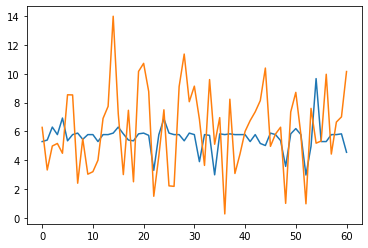

In [8]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = np.asarray(df[['adjusted_yards_per_attempt', 'completed_passes', 'interceptions']])
Y = np.asarray(df['AVp16'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  -0.019169484934915992
Weights:  [0.         0.         2.47836065]


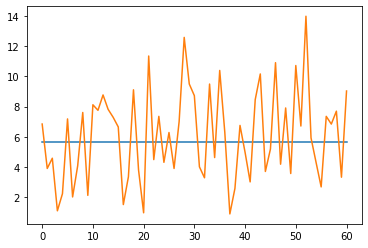

In [11]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test)
plt.show()

Score:  -0.01855724839410211
Weights:  [0.         0.         1.64773842]


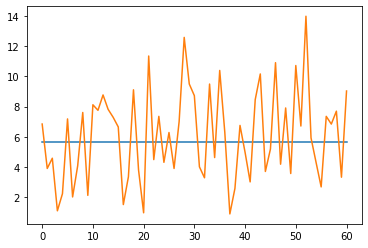

In [12]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [13]:
scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

scores = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = .5)
    lineReg.fit(X_train, y_train)
    scores.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(scores))
print(np.mean(coefs, axis=0))

Linear Regression
-0.022993918962154948
[0.         0.         1.62478501]

Ridge Regression
-0.02367853937382283
[0.         0.         1.01994027]
